<a href="https://colab.research.google.com/github/aymericvie/Covid19_coevolution/blob/main/Vaccine_escape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0. 10.]
 [ 1.  0.]]
[10.0, 26.0, 66.0, 159.0, 366.0, 798.0, 1653.0, 3240.0, 5986.0, 10390.0, 16873.0, 25516.0, 35735.0, 46052.0, 54199.0, 57730.0, 55039.0, 46321.0, 33806.0, 20894.0, 10578.0, 4173.0, 1646.0, 650.0, 257.0, 103.0, 45.0, 30.0, 45.0, 105.0, 270.0, 707.0, 1858.0, 4885.0, 12849.0, 33792.0, 88873.0, 233735.0, 614723.0, 1616720.0, 4251975.0, 11182693.0, 29410483.0, 77349570.0, 203429370.0, 535019243.0, 1407100608.0, 3700674599.0, 9732774194.0, 25597196131.0]
[10.0, 26.0, 66.0, 159.0, 366.0, 798.0, 1653.0, 3240.0, 5986.0, 10390.0, 16873.0, 25516.0, 35735.0, 46052.0, 54199.0, 57730.0, 55039.0, 46321.0, 33806.0, 20894.0, 10578.0, 4173.0, 1646.0, 650.0, 257.0, 103.0, 45.0, 30.0, 45.0, 105.0, 270.0, 707.0, 1858.0, 4885.0, 12849.0, 33792.0, 88873.0, 233735.0, 614723.0, 1616720.0, 4251975.0, 11182693.0, 29410483.0, 77349570.0, 203429370.0, 535019243.0, 1407100608.0, 3700674599.0, 9732774194.0, 25597196131.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

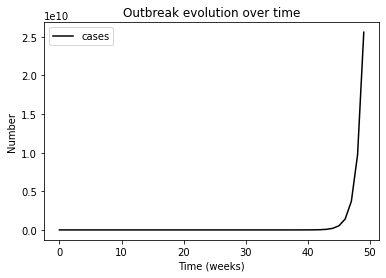

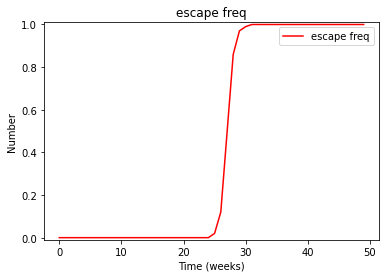

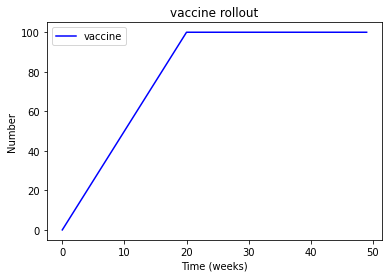

In [1]:
# import the packages
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
from numpy import inf

# set the fixed parameters
virusR = 2.63
virus_population_size = 10

def main(tau, mutation_rate, new_vaccinated, efficacy):

  # initialisation and results vectors
  perc_vaccinated = 0
  escape_frequency = []
  vaccine_history = []
  cases = []

  # Creation of the initial populations
  #virus_population = np.zeros((virus_population_size,1)) #Maybe I'll have to do a matrix of uniques. This will change escape_frequency calculation.
  virus_population = np.zeros((2,2))
  virus_population[0,1] = virus_population_size #number of vanilla viruses
  virus_population[1,0] = 1
  
  print(virus_population)

  # Starting the loop
  t = 0
  while t < tau: # run the evolutionary algorithm
    # Interrupt at the end of vaccination
    # if perc_vaccinated == 100:
    #   break
    #   print(t)

    # Vaccination
    if t > 0:
      perc_vaccinated = min(perc_vaccinated + new_vaccinated, 100)
    vaccine_history.append(perc_vaccinated)

    # Record the results
    virus_count = np.round(virus_population[0,1] + virus_population[1,1],0)
    cases.append(virus_count)
    if virus_count != 0:
      escape_frequency.append(np.round(virus_population[1,1] / virus_count,2))
    if virus_count == 0:
      escape_frequency.append(0)
    
    if virus_count == 0:
      t += 1
      break
      

    # Virus replication and mutations
    reproduce0 = (virus_population[0,1] * virusR * (1-mutation_rate) + virus_population[1,1] * virusR * (mutation_rate))*(1-(perc_vaccinated/100)*(efficacy/100))
    reproduce1 = virus_population[1,1] * virusR * (1-mutation_rate) + virus_population[0,1] * virusR * (mutation_rate)

    virus_population[0,1] = reproduce0 
    virus_population[1,1] = reproduce1


    # Record the results

    t += 1 

  print(cases)

  # print the figures, return the results
  timer = list(range(0,t))
  print(cases)
  print(timer)
  print(escape_frequency)
  #print(escape_frequency)
  # cases and cumulative cases
  plt.plot(timer, cases, label = "cases", color = "black")
  plt.xlabel('Time (weeks)')
  plt.ylabel('Number')
  plt.title('Outbreak evolution over time')
  plt.legend()
  #plt.savefig('.eps')
  #files.download('.eps')
  plt.show()

  plt.plot(timer, escape_frequency, label = "escape freq", color = "red")
  plt.xlabel('Time (weeks)')
  plt.ylabel('Number')
  plt.title('escape freq')
  plt.legend()
  plt.ylim(-0.01,1.01)
  #plt.savefig('.eps')
  #files.download('.eps')
  plt.show()

  plt.plot(timer, vaccine_history, label = "vaccine", color = "blue")
  plt.xlabel('Time (weeks)')
  plt.ylabel('Number')
  plt.title('vaccine rollout')
  plt.legend()
  #plt.savefig('.eps')
  #files.download('.eps')
  plt.show()

main(50,0.000000000001,5,85)
